In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe()
holiday_Sales=df.groupby('Holiday_Flag') ['Weekly_Sales'].agg(['sum','mean']).reset_index()
holiday_Sales['Holiday_Flag']=holiday_Sales['Holiday_Flag'].map({0: 'Non-Holiday',1:'Holiday'})
holiday_Sales['Holiday_Flag']
holiday_Sales

,Holiday_Flag,sum,mean
0,Non-Holiday,6.231919e+09,1.041256e+06
1,Holiday,5.052996e+08,1.122888e+06


**Holiday Vs Non-Holiday Sales**

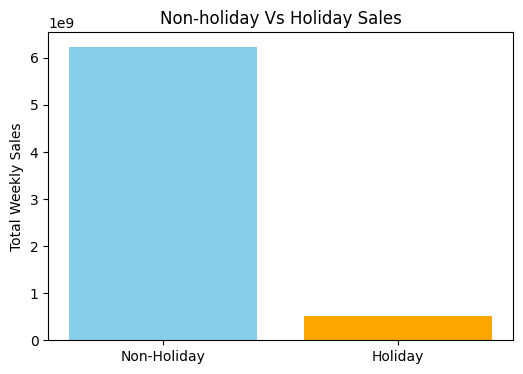

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(holiday_Sales['Holiday_Flag'],holiday_Sales['sum'],color=['skyblue','orange'])
plt.ylabel('Total Weekly Sales')
plt.title('Non-holiday Vs Holiday Sales')
plt.show()

In [ ]:

non_holiday_mean= holiday_Sales.loc[holiday_Sales['Holiday_Flag']=='Non-Holiday','mean'].values[0]
holiday_mean=holiday_Sales.loc[holiday_Sales['Holiday_Flag']=='Holiday','mean'].values[0]
percent_increase=((holiday_mean-non_holiday_mean)/non_holiday_mean)*100
print(f"Average increase weekly sales during holiday weeks: {percent_increase:.2f}%")

Average increase weekly sales during holiday weeks: 7.84%


**External Factors Correlation**

In [ ]:
numeric_cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
correlation = df[numeric_cols].corr()
print(correlation)

              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000


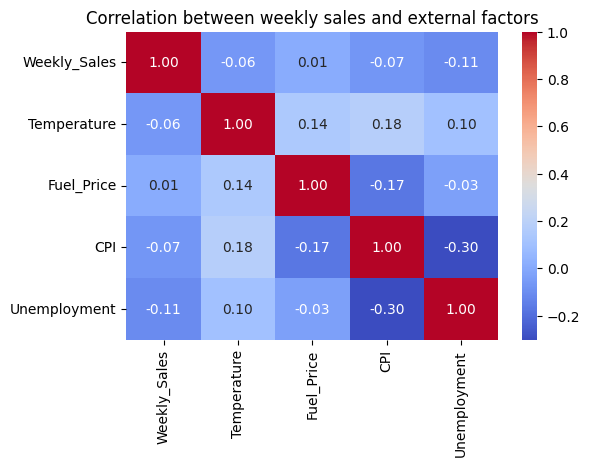

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation between weekly sales and external factors")
plt.show()

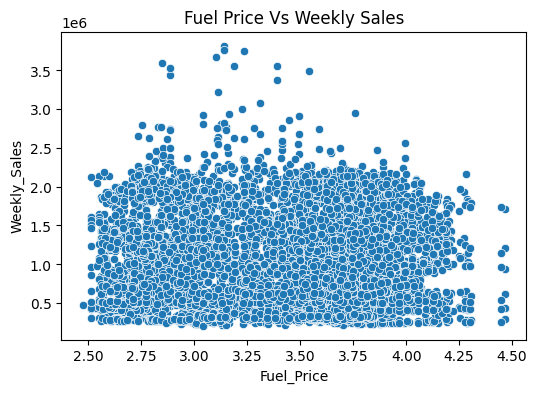

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df)
plt.title('Fuel Price Vs Weekly Sales')
plt.show()

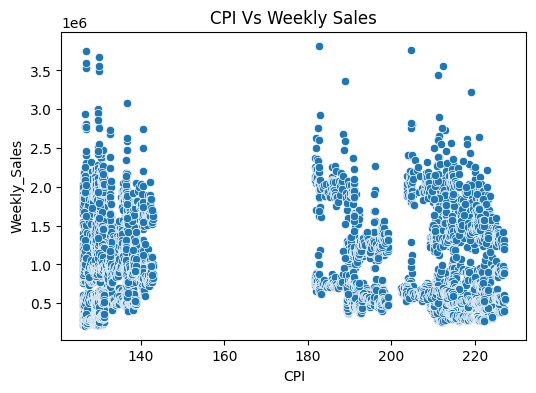

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=df)
plt.title('CPI Vs Weekly Sales')
plt.show()

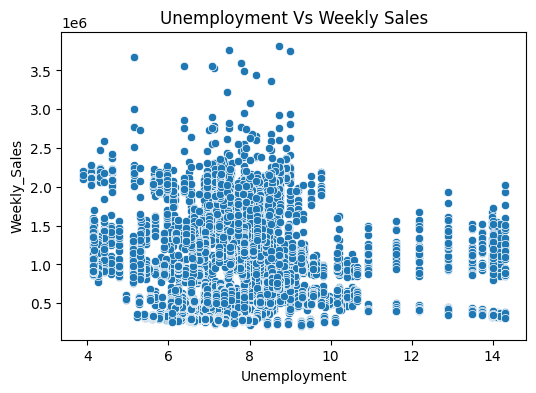

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=df)
plt.title('Unemployment Vs Weekly Sales')
plt.show()

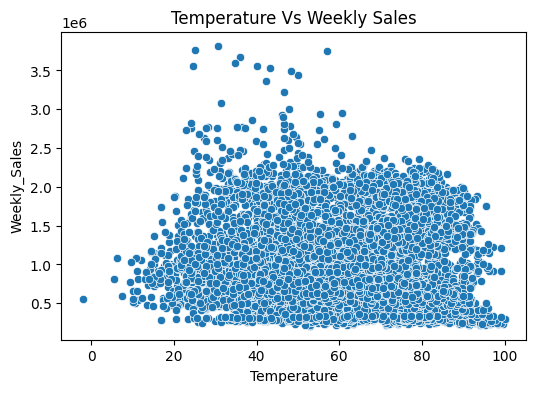

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df)
plt.title('Temperature Vs Weekly Sales')
plt.show()

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**Regression**

In [ ]:
import statsmodels.api as sm
X=df[['Fuel_Price','CPI','Unemployment','Holiday_Flag']]
Y=df['Weekly_Sales']
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     41.13
Date:                Wed, 31 Dec 2025   Prob (F-statistic):           4.30e-34
Time:                        10:36:05   Log-Likelihood:                -94271.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.726e+06   7.98e+04     21.641   

**Forecasting (Holt-Winter)**

In [ ]:
import pandas as pd
df['Corrected_date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
weekly_sales = (df.groupby('Corrected_date') ['Weekly_Sales'].sum().reset_index())
weekly_sales.set_index('Corrected_date',inplace=True)
weekly_sales.head()

,Weekly_Sales
Corrected_date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


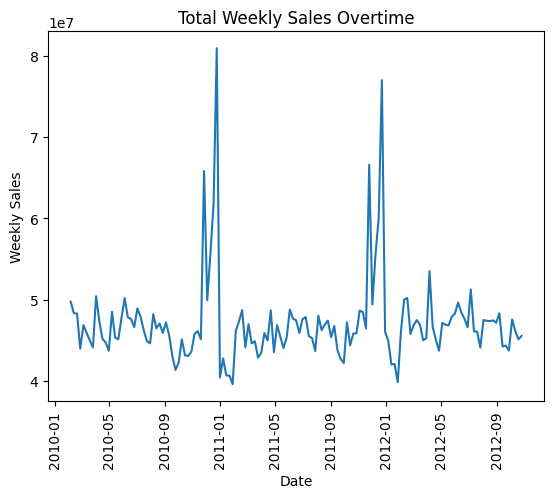

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(weekly_sales.index,weekly_sales['Weekly_Sales'])
plt.title('Total Weekly Sales Overtime')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
!pip install --upgrade statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(weekly_sales['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=52)
hw_fit=model.fit()
forecast=hw_fit.forecast(52)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


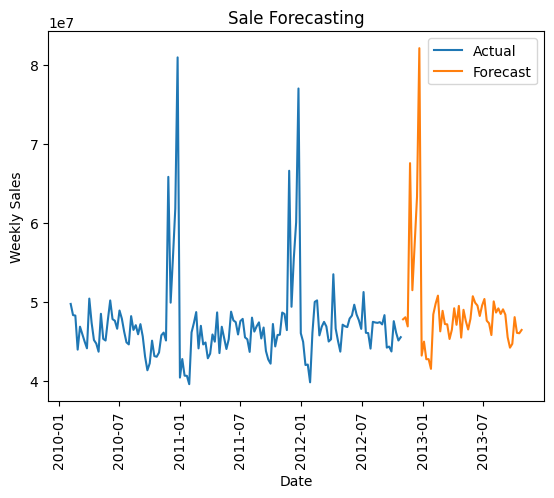

In [ ]:
plt.figure()
plt.plot(weekly_sales.index,weekly_sales['Weekly_Sales'],label='Actual')
plt.plot(forecast.index,forecast,label='Forecast')
plt.legend()
plt.title('Sale Forecasting')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.show()